# k-近邻算法 
k近邻算法采用测量不同特征值之间的距离方法进行分类  
* 优点：精度高、对异常值不敏感、无数据输入假定。
* 缺点：计算复杂度高、空间复杂度高。
* 适用数据范围：数值型和标称型。

工作原理：  
存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据与所属分类的对应关系。输入没有标签的新数据之后，将新数据的每个特征与样本集中数据对应的特征进行比较，然后算法提取样本集中特征最相似（最近邻）数据的分类标签。一般来说，我们只选择样本数据集中前k个最相似的数据，这就是k-近邻法中k的出处，通常k是不大于20的整数。最后，选择k个最相似数据中出现次数最多的分类，作为新数据的分类。

k-近邻算法的一般流程：
1. 收集数据：可以使用任何方法
2. 准备数据：距离计算所需要的数值，最好是结构化的数据格式。
3. 分析数据：可以使用任何方法
4. 训练算法：此步骤不用于k-近邻算法
5. 测试算法：计算错误率
6. 使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输入数据属于哪个分类，最后应用对计算出的分类执行后续的处理。

## 准备：使用Python导入数据
创建名为kNN.py的python模块。

In [3]:
from numpy import *
import operator #运算符模块

def createDataSet():
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

进入python开发环境之后，导入kNN模块。

In [ ]:
import kNN

为了确保输入相同的数据集

In [ ]:
group,labels = kNN.createDataSet

## 实施 k-近邻算法
其伪代码为：  
对未知类别属性的数据集中的每个点依次执行以下操作：  
1. 计算已知类别数据集中的点与当前点之间的距离
2. 按照距离递增排列
3. 选取与当前点距离最小的k个点
4. 确定前k个点所在类别的出现频率
5. 返回前k个点出现频率最高的类别作为当前点的预测分类

In [46]:
def classify0(inX, dataSet, labels, k):         #inX用于分类的输入向量;dataSet训练样本集;labels标签向量，k选择最近邻居数目
    dataSetSize = dataSet.shape[0]                  #shape[0]读取矩阵第一维度的长度
    diffMat = tile(inX, (dataSetSize,1))-dataSet    #tile（a, [b,c]）a在行上重复b次，在列上重复c次 
    sqDiffMat = diffMat**2                         #欧式距离公式
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    sortedDistIndicies = distances.argsort() #argsort()对数组数值从小到大排列，按顺序返回索引
    classCount={}
    for i in range (k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1 #返回字典classCount中voteIlabel元素对应的值
        #若无，则进行初始化，+1是每一次都会起作用的,因为不管遇到字典内已经存在的或者不存在的，都需要把这个元素记录下来
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    #operator.itemgetter(1)返回一个可调用对象,如果制定了多个items，返回一个由查询值组成的元组
    return sortedClassCount[0][0]

## 如何测试分类器
可以使用已知答案的数据进行测试，通过大量的测试数据，我们可以得到分类器的错误率

# 示例：在约会网站上使用k-近邻算法
1. 收集数据：提供文本文件
2. 准备数据：使用Python解析文件
3. 分析数据：使用Matplotlib画二维扩散图
4. 训练算法：此步骤不适用于k-近邻算法
5. 测试算法：使用海伦提供的部分数据作为测试样本
6. 使用算法：产生简单命令行程序，然后海伦可以输入一些特征数据判断对方是否是自己喜欢的类型

## 从文本中解析数据
数据存放在datingTestSet2.txt中，每个样本数据占据一行，总共1000行，包含3种特征：
* 每年获得的飞行常客里程数
* 玩视频游戏所耗时间百分比
* 每周消费的冰淇淋公升数 

In [47]:
from numpy import *
import operator 

def file2matrix(filename):
    fr = open(filename)
    arrayOLines = fr.readlines() # readlines()一次性读取整个文件；自动将文件内容分析成一个行的列表
    numberOfLines = len(arrayOLines)
    returnMat = zeros((numberOfLines,3)) #创建以0填充的矩阵Numpy
    classLabelVector = []
    index = 0
    for line in arrayOLines:
        line = line.strip() #line.strip()截取掉所有的回车字符
        listFromLine = line.split('\t') #使用tab将上一步得到的整行数据分割成元素列表
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector

In [48]:
from numpy import *
import operator 
datingDataMat,datingLabels = file2matrix('/home/liu/Documents/jupyter/machine/data/Ch02/datingTestSet2.txt')

In [49]:
datingDataMat

array([[4.0920000e+04, 8.3269760e+00, 9.5395200e-01],
       [1.4488000e+04, 7.1534690e+00, 1.6739040e+00],
       [2.6052000e+04, 1.4418710e+00, 8.0512400e-01],
       ...,
       [2.6575000e+04, 1.0650102e+01, 8.6662700e-01],
       [4.8111000e+04, 9.1345280e+00, 7.2804500e-01],
       [4.3757000e+04, 7.8826010e+00, 1.3324460e+00]])

In [50]:
datingLabels[0:20]

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]

## 分析数据：使用Matplotlib创建散点图

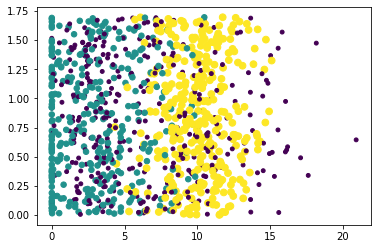

In [51]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111) #一行一列，1x1网格，第一子图
ax.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

带有样本分类标签的约会数据散点图。虽然能够比较容易区分数据点从属类别，但依然很难根据这张图得出结论性的信息

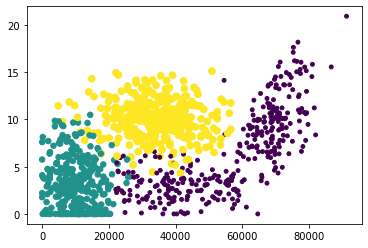

In [52]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111) #一行一列，1x1网格，第一子图
ax.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*array(datingLabels),15.0*array(datingLabels))
plt.show()

每年赢得飞行常客里程数与玩视频游戏所占百分比的约会数据散点图。约会数据有三个特征，通过图中展示的两个特征更容易区分数据点从属的类别

## 准备数据：归一化数值
在处理这种不同取值范围的特征值时，通常采用归一化处理。

In [53]:
def autoNorm(dataSet):
    minVals = dataSet.min(0) #参数0取每列的最小值
    maxVals = dataSet.max(0)  
    ranges = maxVals - minVals
    normDataSet = zeros(shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - tile(minVals, (m,1)) #使用当前值减去最小值再除以数值变化范围
    normDataSet = normDataSet/tile(ranges, (m,1))
    return normDataSet, ranges, minVals

In [54]:
normDataSet, ranges, minVals = autoNorm(datingDataMat)

In [55]:
normDataSet

array([[0.44832535, 0.39805139, 0.56233353],
       [0.15873259, 0.34195467, 0.98724416],
       [0.28542943, 0.06892523, 0.47449629],
       ...,
       [0.29115949, 0.50910294, 0.51079493],
       [0.52711097, 0.43665451, 0.4290048 ],
       [0.47940793, 0.3768091 , 0.78571804]])

In [56]:
ranges

array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00])

In [57]:
minVals

array([0.      , 0.      , 0.001156])

In [58]:
from numpy import *
import operator 
def datingClassTest():
    hoRatio = 0.50      #hold out 10%
    datingDataMat,datingLabels = file2matrix('/home/liu/Documents/jupyter/machine/data/Ch02/datingTestSet2.txt')       #load data setfrom file
    normMat, ranges, minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        print("the classifier came back with: %d, the real answer is: %d" % (classifierResult, datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount += 1.0
    print ("the total error rate is: %f" % (errorCount/float(numTestVecs)))
    print (errorCount)

In [59]:
datingClassTest()

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

这个例子表明分类器处理约会数据集的错误率是6.6%

## 使用算法：构建完整可用系统
通过该程序海伦在约会网站上找到某个人的信息，程序会给出她对对方喜欢程度的预测值。

In [106]:
def classifyPerson():
    resultList = ['not at all', 'in small doses', 'in large doses']
    percentTats = float(input("percentage of time spent palying video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream =  float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLables = file2matrix('/home/liu/Documents/jupyter/machine/data/Ch02/datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles,percentTats,iceCream])
    classifierResult = classify0((inArr-minVals)/ranges, normMat, datingLabels,3)
    print("You will probaly like this person:", resultList[classifierResult -1])

In [107]:
classifyPerson()

percentage of time spent palying video games?20
frequent flier miles earned per year?2000
liters of ice cream consumed per year?1
You will probaly like this person: in large doses


# 示例：手写识别系统
构造的系统识别1-9位数字，且需要识别的数字用图形处理软件，处理成具有相同大小色彩的黑白图像。

## 准备数据：将图像转换为测试向量

In [99]:
def img2vector(filename):
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [100]:
testVector = img2vector('/home/liu/Documents/jupyter/machine/data/Ch02/digits/testDigits/0_13.txt')

In [101]:
testVector[0, 0:31]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [110]:
from os import listdir
def handwritingClassTest():
    hwLabels = []
    trainingFileList = listdir('/home/liu/Documents/jupyter/machine/data/Ch02/digits/trainingDigits/')           #load the training set
    m = len(trainingFileList)
    trainingMat = zeros((m,1024))
    for i in range(m):
        fileNameStr = trainingFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        hwLabels.append(classNumStr)
        trainingMat[i,:] = img2vector('/home/liu/Documents/jupyter/machine/data/Ch02/digits/trainingDigits/%s' % fileNameStr)
    testFileList = listdir('/home/liu/Documents/jupyter/machine/data/Ch02/digits/testDigits/')        #iterate through the test set
    errorCount = 0.0
    mTest = len(testFileList)
    for i in range(mTest):
        fileNameStr = testFileList[i]
        fileStr = fileNameStr.split('.')[0]     #take off .txt
        classNumStr = int(fileStr.split('_')[0])
        vectorUnderTest = img2vector('/home/liu/Documents/jupyter/machine/data/Ch02/digits/testDigits/%s' % fileNameStr)
        classifierResult = classify0(vectorUnderTest, trainingMat, hwLabels, 3)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))
        if (classifierResult != classNumStr): errorCount += 1.0
    print ("\nthe total number of errors is: %d" % errorCount)
    print ("\nthe total error rate is: %f" % (errorCount/float(mTest)))

In [111]:
handwritingClassTest()

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 3, the real answe

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 5, the real answe

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answe

the classifier came back with: 2, the real answer is: 2
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 3, the real answe

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 1, the real answe

the classifier came back with: 8, the real answer is: 8
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 2, the real answer is: 2
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 8, the real answer is: 8
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 5, the real answer is: 5
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 7, the real answe

k-近邻算法识别手写数据集，错误率为1.2%。改变k的值、修改函数随机选取样本的数目，都会对k近邻算法的错误率产生影响。

k-近邻算法应用时十分耗时，其次它无法给出任何数据的基础结构信息，因此我们也无法知晓平均实例样本和典型实例样本具有什么特征。